In [9]:
import pandas as pd
import numpy as np
import os

In [6]:
# Evolution temporelle retourne pour une dataframe les differentes variables groupées par ping, 
# puis aggreer par moyenne, std, ou somme
# -> Permet de moyenner un csv dans l'espace pour ne considerer que les variations temporelles

def evolution_temporelle(df):
    
    df['duedate'] = pd.to_datetime(df['duedate'])
    df['ping_time'] = pd.to_datetime(df['ping_time'])
    
    df_mean       = df[['ebike', 'mechanical', 'duedate', 'numbikesavailable', 'numdocksavailable', \
    'capacity', 'is_renting', 'is_installed', 'is_returning', 'ping_time']].groupby('ping_time').mean()
    
    df_std        = df[['ebike', 'mechanical', 'duedate', 'numbikesavailable', 'numdocksavailable', \
    'capacity', 'is_renting', 'is_installed', 'is_returning', 'ping_time']].groupby('ping_time').std()
    
    df_sum        = df[['ebike', 'mechanical','numbikesavailable', 'numdocksavailable', \
    'capacity', 'is_renting', 'is_installed', 'is_returning', 'ping_time']].groupby('ping_time').sum()
    
    df_mean= df_mean[['ebike', 'mechanical', 'numbikesavailable', 'numdocksavailable', \
    'capacity', 'is_renting', 'is_installed', 'is_returning', 'duedate']].add_suffix('_mean')
    
    df_std= df_std[['ebike', 'mechanical', 'numbikesavailable', 'numdocksavailable', \
    'capacity', 'is_renting', 'is_installed', 'is_returning', 'duedate']].add_suffix('_std')
    
    df_sum= df_sum[['ebike', 'mechanical','numbikesavailable', 'numdocksavailable', \
    'capacity', 'is_renting', 'is_installed', 'is_returning']].add_suffix('_sum')
    
    df_sum['nbr_station'] = df['name'].nunique()
    
    return pd.concat([df_mean, df_std, df_sum], axis=1)
    


In [7]:
## Applique evolution_temporelle sur chque csv et synthétise le tout dans un unique dataframe


def lecture_data_temp():
    
    df = pd.DataFrame()
    L = ['MAY_2022', 'JUN_2022', 'JUL_2022', 'AUG_2022', 'NOV_2022', 'DEC_2022',\
        'JAN_2023', 'FEB_2023', 'MAY_2023', 'JUN_2023', 'JUL_2023', 'AUG_2023', 'SEP_2023', 'OCT_2023']
    
    L2= pd.to_datetime(np.array(L), format='%b_%Y')
    directory = 'data_traitees\\data_entieres'
    
    i=0
    
    while i< len(L):
        
        f = os.path.join(directory, "Velib_"+L[i]+'.csv')
        print("Velib_"+L[i]+'.csv')
        
        if i < len(L)-1:
            
            if i == 0:
                A = pd.read_csv(f)
                A = evolution_temporelle(A)
            else:
                A = A2
                
            f2 = os.path.join(directory, "Velib_"+L[i+1]+'.csv')
            print('Lecture fichier ...')
            A2 = pd.read_csv(f2)
            print('Traitement fichier ...')
            A2 = evolution_temporelle(A2)
            
            if L2[i+1] == L2[i] + pd.DateOffset(months=1):
                A = A[A.index<A2.index.min()]
                
            else :
                A = A[A.index<L2[i] + pd.DateOffset(months=1)]
        else :
            A=A2
            A = A[A.index<L2[len(L2)-1] + pd.DateOffset(months=1)]
            
        df=pd.concat([df, A])
        i+=1
    return df



In [11]:
# Conversion des données que l'on stock dans df_time, puis on sauvegarde le résultat dans un csv.
df_time = lecture_data_temp()
df_time.to_csv('data_traitees\\data_temporelles\\data_tot.csv')

NameError: name 'df_time' is not defined

In [13]:
df_time=pd.read_csv('..\\data_traitees\\data_temporelles\\data_tot.csv', index_col=['ping_time'], parse_dates = ['duedate_mean', 'ping_time'])


In [14]:
df_time

,ebike_mean,mechanical_mean,numbikesavailable_mean,numdocksavailable_mean,capacity_mean,is_renting_mean,is_installed_mean,is_returning_mean,duedate_mean,ebike_std,...,duedate_std,ebike_sum,mechanical_sum,numbikesavailable_sum,numdocksavailable_sum,capacity_sum,is_renting_sum,is_installed_sum,is_returning_sum,nbr_station
ping_time,,,,,,,,,,,,,,,,,,,,,
2022-05-01 00:50:01,4.273885,6.973815,11.247700,19.146497,31.474168,1.0,1.0,1.0,2022-05-01 00:38:21.803963392,4.166932,...,0 days 00:02:31.526119220,6039.0,9854.0,15893,27054,44473,1413,1413,1413,1420
2022-05-01 01:00:01,4.294409,7.020524,11.314933,19.077849,31.474168,1.0,1.0,1.0,2022-05-01 00:39:14.419674624,4.163405,...,0 days 00:02:28.742500802,6068.0,9920.0,15988,26957,44473,1413,1413,1413,1420
2022-05-01 01:10:01,4.325548,7.023355,11.348903,19.046001,31.474168,1.0,1.0,1.0,2022-05-01 00:39:14.419674624,4.205777,...,0 days 00:02:28.742500786,6112.0,9924.0,16036,26912,44473,1413,1413,1413,1420
2022-05-01 01:20:01,4.334041,7.002831,11.336872,19.058033,31.474168,1.0,1.0,1.0,2022-05-01 00:38:21.803963392,4.180449,...,0 days 00:02:31.526119202,6124.0,9895.0,16019,26929,44473,1413,1413,1413,1420
2022-05-01 01:30:01,4.341826,7.022647,11.364473,19.031139,31.474168,1.0,1.0,1.0,2022-05-01 00:38:21.803963392,4.131676,...,0 days 00:02:31.526119182,6135.0,9923.0,16058,26891,44473,1413,1413,1413,1420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-07 01:58:01,3.412831,6.112273,9.525105,20.977685,31.707113,1.0,1.0,1.0,2023-10-07 01:08:33.698744832,3.256172,...,0 days 03:34:35.087703399,4894.0,8765.0,13659,30082,45468,1434,1434,1434,1433
2023-10-07 02:08:01,3.411437,6.110181,9.521618,20.984658,31.707113,1.0,1.0,1.0,2023-10-07 01:08:33.696652800,3.337416,...,0 days 03:34:35.087588460,4892.0,8762.0,13654,30092,45468,1434,1434,1434,1433
2023-10-07 02:18:01,3.430962,6.095537,9.526499,20.988145,31.707113,1.0,1.0,1.0,2023-10-07 01:08:33.698744832,3.397966,...,0 days 03:34:35.087703403,4920.0,8741.0,13661,30097,45468,1434,1434,1434,1433


# Méthodologie

Au départ, on a un dataset couvrant la période 2022-2023.

Ensuite, on a moyenné ce dataset sur l'ensemble du réseau des stations vélib à chaque ping_time et on obtient le dataframe (ci-dessus) de 51026 lignes et 27 colonnes avec en index la colonne ping_time.


Pour la partie grahique temporelle, on utilise des séries temporelles sur la base de moyenne mobile sur une journée, 
une semaine ou un mois en fonction des besoins de l’analyse pour réduire les bruits et distinguer des tendances (cf graphique ci-dessous). 
Dans cette partie, notre analyse portera sur le nombre de vélibs disponibles, le nombre de stations et le nombre de bornes de vélibs (capacité des stations vélibs).


# Moyenne mobile horaire, quotidienne, hebdomadaire et mensuelle (2022-2023) du nombre de velibs disponibles 

(array([19113., 19174., 19236., 19297., 19358., 19417., 19478., 19539.,
        19601., 19662.]),
 [Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07'),
  Text(19601.0, 0, '2023-09'),
  Text(19662.0, 0, '2023-11')])

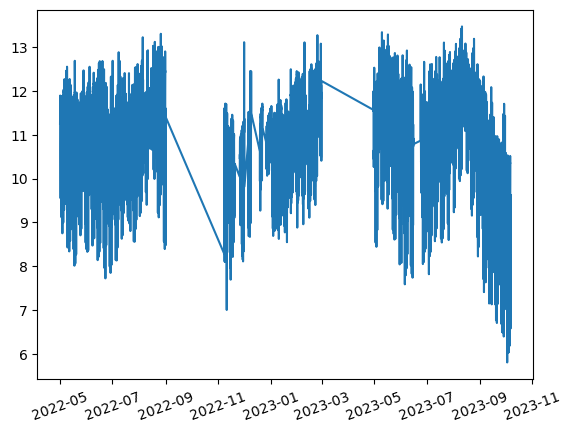

In [18]:
plt.plot(a['numbikesavailable_mean'])
plt.xticks(rotation=20) 

Text(0, 0.5, 'Nombre de velibs disponibles moyen')

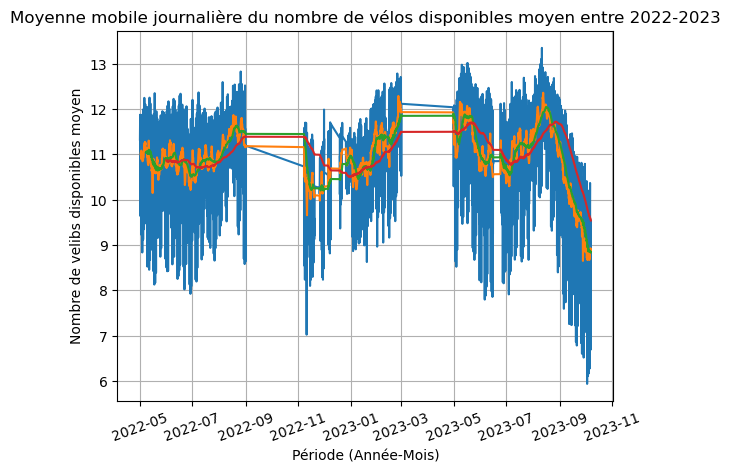

In [15]:
import matplotlib.pyplot as plt

# Analyse sur toute la periode 2022-2023
 
a = df_time

# Pour calculer la moyenne mobile, on retient la colonne du nombre de vélibs disponibles.
 
    
    
    
    
plt.plot(a['numbikesavailable_mean'].rolling(6).mean()) 
plt.plot(a['numbikesavailable_mean'].rolling(6*24).mean()) # moyenne mobile lissée sur une journée

plt.plot(a['numbikesavailable_mean'].rolling(6*24*7).mean()) # moyenne mobile lissée sur une semaine

plt.plot(a['numbikesavailable_mean'].rolling(6*24*30).mean())  # moyenne mobile lissée sur un mois
 
plt.xticks(rotation=20) # étiquettes des labels présenté avec un angle de 20°
plt.grid() # pour dessiner une grille sur le dessus du graphique
 

    
plt.title("Moyenne mobile journalière du nombre de vélos disponibles moyen entre 2022-2023") # titre du graphique

plt.xlabel("Période (Année-Mois)") # label de l'axe des abscisses
plt.ylabel("Nombre de velibs disponibles moyen") # label de l'axe des ordonnées : nombre de velibs disponibles moyen

# plt.plot(a['numbikesavailable_mean'].rolling(6*24*30).mean())  # moyenne mobile lissée sur un mois
#plt.xticks(rotation=20) # étiquettes des labels présenté avec un angle de 20°
#plt.grid() # pour dessiner une grille sur le dessus du graphique
# 
#plt.title("Moyenne mobile journalière du nombre de vélos disponibles moyen entre 2022-2023") # titre du graphique
#
#plt.xlabel("Période (Année-Mois)") # label de l'axe des abscisses
#plt.ylabel("Nombre de velibs disponibles moyen") # label de l'axe des abscisses : nombre de velibs disponibles moyen#


# Analyse sur toute la periode 2022-2023 : évolution de la moyenne mobile hebdomadaire du nombre de vélibs disponibles dans les stations


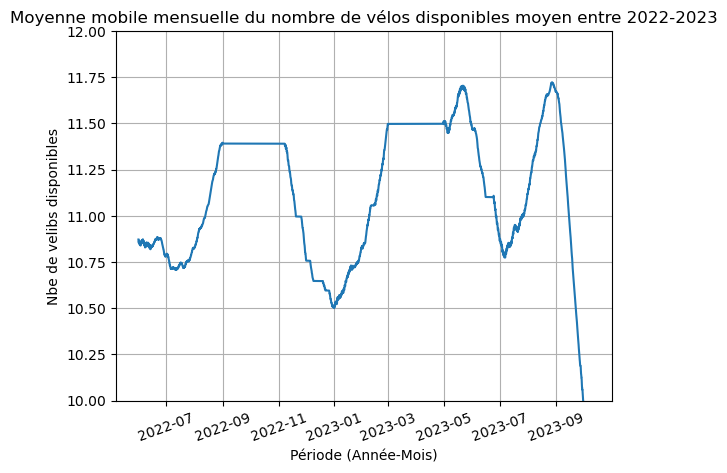

In [41]:
# Analyse sur toute la periode 2022-2023 : evolution de la moyenne mobile hebdomadaire


a = df 
 
# choix de la moyenne mobile mensuelle pour pour analyser l'évolution temporelle entre 2022 et 2023 du nombre de vélibs disponibles
 

plt.plot(a['numbikesavailable_mean'].rolling(6*24*30).mean()) 
plt.xticks(rotation=20)  # étiquettes des labels présenté avec un angle de 20°
plt.grid() # pour dessiner une grille sur le dessus du graphique 

plt.title("Moyenne mobile mensuelle du nombre de vélos disponibles moyen entre 2022-2023") # titre du graphique

plt.xlabel("Période (Année-Mois)") # label de l'axe des abscisses
plt.ylabel("Nbe de velibs disponibles") # label de l'axe des ordonnées : nombre de velibs disponibles moyen
plt.ylim(10, 12)  # titre du graphique
plt.savefig("ANALYSE TEMPORELLE 2022-2023.png") # sauvegarder le graphique sous format png

A travers ce graphique, on observe un seuil correspondant à la moyenne de vélos disponibles autour de 11 qui nous permet de distinguer deux grosses périodes d'utilisation durant l'année :

- la première où on remarque une plus grande utilisation entre mai à juillet et décembre à février qui se traduit par une faible disponibiilté des vélos entre 10,75 et 11. Cela peut s'expliquer en été par les vacances et en hiver par le froid, pluie...
- et une seconde avec une moindre intensité en termes d'utilisation de août à novembre et mars à mai avec un nombre de vélos disponibles moyens compris entre 11 et 11,75. 

On ne constate pas de hausse globale de la disponibilité des vélibs.

# Evolution du nombre de stations velib entre 2022-2023

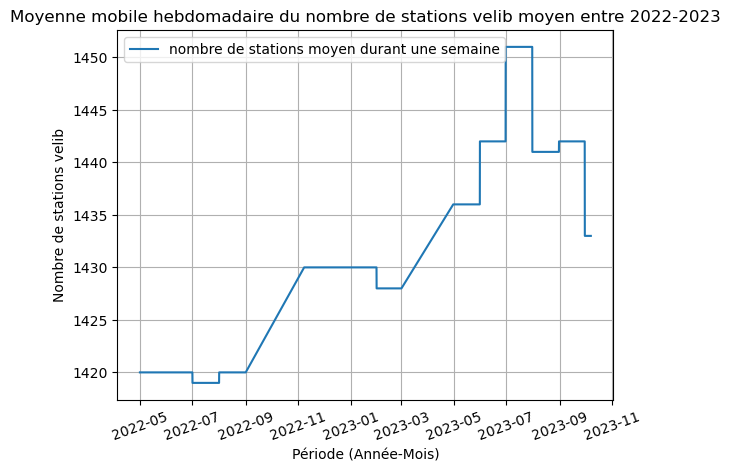

In [20]:
#plt.figure(figsize=(10, 6))
a = df_time

# choix de la moyenne mobile hebdomadaire pour analyser l'évolution temporelle entre 2022 et 2023 du nombre de stations

plt.plot(a['nbr_station'].rolling(1).mean()) # moyenne mobile mensuelle du nombre de stations avec un paramètre window s'étalant sur une semaine
 
plt.xticks(rotation=20) # étiquettes des labels présenté avec un angle de 20°
plt.grid() # pour dessiner une grille sur le dessus du graphique
 
plt.title("Moyenne mobile hebdomadaire du nombre de stations velib moyen entre 2022-2023") # titre du graphique

plt.xlabel("Période (Année-Mois)") # label de l'axe des abscisses
plt.ylabel("Nombre de stations velib") # label de l'axe des ordonnées : nombre de velibs disponibles moyen

plt.legend(["nombre de stations moyen durant une semaine"], loc ="upper left") # légende indiqué en haut à gauche du graphique



Le nombre de stations vélib a augmenté de 30 entre mai 2022 et octobre 2023 notammment dans la perspective des JO.

# Evolution du nombre de bornettes dans les stations velib (capacité de la station) entre 2022-2023

Text(0, 0.5, 'Nombre de bornettes velib')

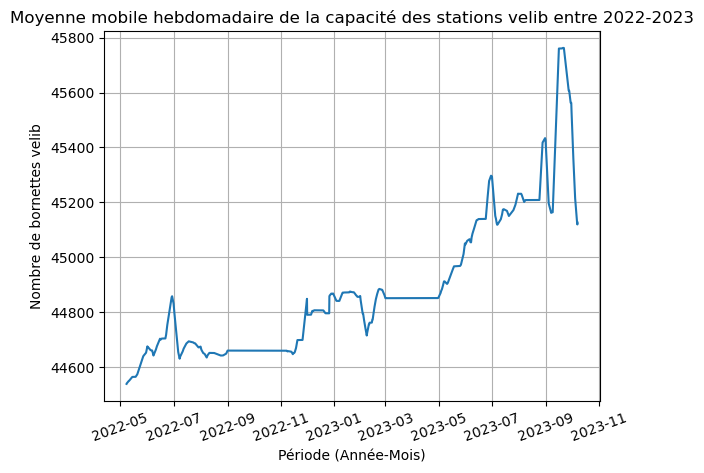

In [25]:
#plt.figure(figsize=(10, 6))
a = df_time#[df_time.index < df_time.index[0] + pd.DateOffset(months=3)]
 

plt.plot(a['capacity_sum'].rolling(6*24*7).mean())  # moyenne mobile hebdomadaire de la capacité des stations du réseau (ie du nombre de bornes du réseau)

 
plt.xticks(rotation=20)  # étiquettes des labels présenté avec un angle de 20°
plt.grid() # pour dessiner une grille sur le dessus du graphique
 
plt.title("Moyenne mobile hebdomadaire de la capacité des stations velib entre 2022-2023") # titre du graphique

plt.xlabel("Période (Année-Mois)")   # label de l'axe des abscisses
plt.ylabel("Nombre de bornettes velib")  # label de l'axe des ordonnées : nombre de bornes vélibs




On a une augmentation du nombre de bornettes qui confirme l'augmentation du nombre de stations velib durant cette période.
On est passé de 44600 à 45800 bornes.

# Nombre de vélos disponibles sur une journée type

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


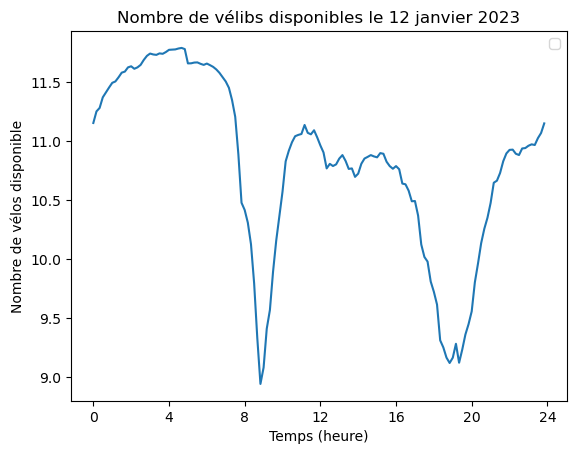

In [28]:
import datetime as dt  # pour manipuler et travailler sur les dates
import numpy as np


start_date = dt.datetime(2023, 1, 12) + pd.DateOffset(days=0)   # dt.datetime(2023, 1, 12) : date initiale à partir de laquelle on travaille
end_date   = dt.datetime(2023, 1, 12) + pd.DateOffset(days=1) # DateOffset: type standard d'incrément de date utilisé pour une plage de dates, ici, 
                                                            # l'argument days est d'un jour pour travailler sur lintégralité du 12/01/2023

mask = (df_time.index>= start_date) & (df_time.index <= end_date)     # variable mask  : condition où la date en index >=  à variable start_date (date de début) 
                                                                        #et <= end_date (date de fin)                                       

Y2 = df_time.loc[mask,'numbikesavailable_mean'].to_numpy()  #coordonnées du graphique  : on applique la condition à la colonne nombre de vélibs disponibles 
                                                           # du dataframe que l'on convertit en tableau numpy

X = np.arange(0, len(Y2))                            # abscisses du graphique : intervalle qui prend toutes les valeurs correspondant à la condition ci_dessus

##########################################


##########################################
labels = range(0, 80*5, 4)
plt.xticks(range(0, 2400, 24), labels)    # espacement de 24*10min = 4h


plt.title("Nombre de vélibs disponibles le 12 janvier 2023")   # titre du graphique
plt.xlabel('Temps (heure)')   # label de l'axe des abscisses
plt.ylabel('Nombre de vélos disponible') #label de l'axe des ordonnées 
plt.plot(X, Y2)  # affichage du graphique

plt.legend()
plt.show()


 

# Différence utilisation vélib hiver / été

On choisit un jour type en hiver et un en été puis on compare le comportement des utilsateurs de vélibs.

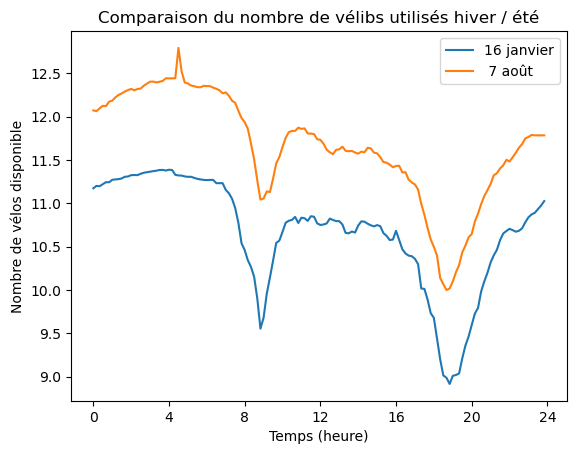

In [9]:
import datetime as dt 
import numpy as np

# 1ère courbe
start_date = dt.datetime(2023, 1, 16) + pd.DateOffset(days=0)      # dt.datetime() : date initiale sur laquelle on travaille
end_date   = dt.datetime(2023, 1, 16) + pd.DateOffset(days=1)      # DateOffset: type standard d'incrément de date utilisé pour une plage de dates, ici,
                                                                    #l'argument est d'un jour pour travailler sur lintégralité du 16/01/2023 

mask = (df.index>= start_date) & (df.index <= end_date)         # variable mask  : condition où la date en index >=  à variable start_date (date de début)
                                                                    # et <= end_date (date de fin)

Y2 = df.loc[mask,'numbikesavailable_mean'].to_numpy()   # ordonnées du premier graphique : on applique la condition à la colonne nombre de vélibs disponibles
                                                        ## du dataframe que l'on convertit en tableau numpy

X = np.arange(0, len(Y2))                                        # abscisses des graphiques :intervalle qui prend toutes les valeurs correspondant à la condition ci_dessus

##########################################
# 2ème courbe :

start_date = dt.datetime(2023, 8, 7) + pd.DateOffset(days=0)      # dt.datetime() : date initiale sur laquelle on travaille
end_date   = dt.datetime(2023, 8, 7) + pd.DateOffset(days=1)       # DateOffset: type standard d'incrément de date utilisé pour une plage de dates, ici,
                                                                    #l'argument est d'un jour pour travailler sur lintégralité du 7/08/2023 

mask = (df.index>= start_date) & (df.index <= end_date)            # variable mask  : condition où la date en index >=  à variable start_date (date de début)
                                                                    # et <= end_date (date de fin)

Y3 = df.loc[mask,'numbikesavailable_mean'].to_numpy()       #ordonnées du 2ème graphique : on applique la condition à la colonne nombre de vélibs disponibles du dataframe que 
                                                                     ## du dataframe que l'on convertit en tableau numpy

##########################################
labels = range(0, 80*5, 4)
plt.xticks(range(0, 2400, 24), labels)  # espacement de 24*10min = 4h

plt.title("Comparaison du nombre de vélibs utilisés hiver / été")        # titre du graphique 
plt.xlabel('Temps (heure)')   # label de l'axe des abscisses
plt.ylabel('Nombre de vélos disponible')  # label de l'axe des ordonnées : nombre de velibs disponibles moyen
plt.plot(X, Y2, label='16 janvier') # affichage du graphique et label de la 1ère courbe
plt.plot(X, Y3, label=' 7 août')    # affichage du graphique et label de la 2ème courbe
plt.legend()
plt.show()


On constate une utilisation de velib plus marquée au mois de janvier qu'en été (en août) probablement dû aux vacances, utilisation
du velib lié au trajet domicile-travail en semaine donc en période de vacances (plus de vélos disponibles donc non utilisés).
Utilisation moindre de la part des touristes qui ne renversent pas cette tendance...

# Comparaison du nombre de velibs disponibles semaine / week-end

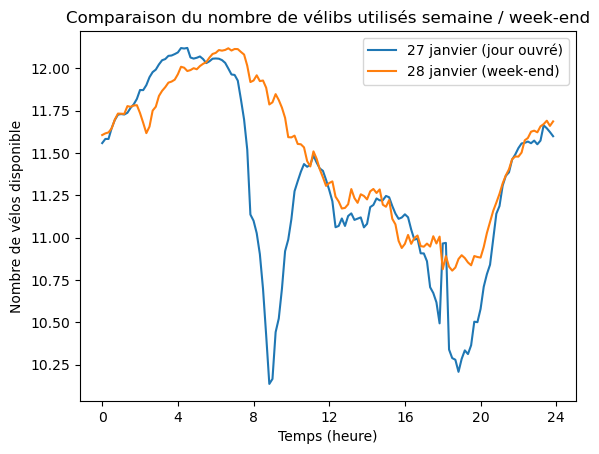

In [10]:
#1er graphique :

start_date = dt.datetime(2023, 1, 27) + pd.DateOffset(days=0)     # dt.datetime() : date initiale sur laquelle on travaille
end_date   = dt.datetime(2023, 1, 27) + pd.DateOffset(days=1)     # DateOffset: type standard d'incrément de date utilisé pour une plage de dates, ici,
                                                                #l'argument est d'un jour pour travailler sur l'intégralité du 27/01/2023 
mask = (df.index>= start_date) & (df.index <= end_date)        # variable mask  : condition où la date en index >=  à variable start_date (date de début) 
                                                                        #et <= end_date (date de fin) 

Y2 = df.loc[mask,'numbikesavailable_mean'].to_numpy()   # ordonnées du premier graphique : on applique la condition à la colonne nombre de vélibs disponibles 
                                                                  # du dataframe que l'on convertit en tableau numpy

X = np.arange(0, len(Y2))                     # abscisses des graphiques : intervalle qui prend toutes les valeurs correspondant à la condition ci_dessus

##########################################
#2ème graphique :
start_date = dt.datetime(2023, 1, 28) + pd.DateOffset(days=0)   # dt.datetime(2023, 1, 12) : date initiale sur laquelle on travaille
end_date   = dt.datetime(2023, 1, 28) + pd.DateOffset(days=1)    #DateOffset: type standard d'incrément de date utilisé pour une plage de dates, ici,
                                                                #l'argument est d'un jour pour travailler sur lintégralité du 28/01/2023 

mask = (df.index>= start_date) & (df.index <= end_date)         # variable mask  : condition où la date en index >=  à variable start_date (date de début) 
                                                                        #et <= end_date (date de fin) 

Y3 = df.loc[mask,'numbikesavailable_mean'].to_numpy()     # ordonnées du premier graphique : on applique la condition à la colonne nombre de vélibs disponibles 
                                                                  ## du dataframe que l'on convertit en tableau numpy 

##########################################
labels = range(0, 80*5, 4)      
plt.xticks(range(0, 2400, 24), labels) # espacement de 24*10min = 4h

plt.title("Comparaison du nombre de vélibs utilisés semaine / week-end")
plt.xlabel('Temps (heure)') # label de l'axe des abscisses 
plt.ylabel('Nombre de vélos disponible') # label de l'axe des ordonnées : nombre de velibs disponibles moyen
plt.plot(X, Y2, label='27 janvier (jour ouvré)')  # affichage du graphique et label de la 1ère courbe
plt.plot(X, Y3, label='28 janvier (week-end)')   # affichage du graphique et label de la seconde courbe
plt.legend()
plt.show()



Moins de velibs disponibles en semaine qu'en week-end, donc, plus grande sollicitation du réseau en semaine,
lié au trajet domicile - travail (voir les pics de 9h et 18h).

# Comparatif jour de grève le 19/01/2023 

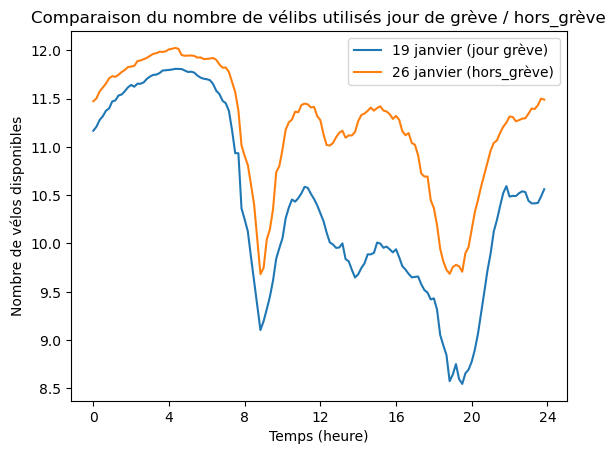

In [51]:
# 1er graphique :

start_date = dt.datetime(2023, 1, 19) + pd.DateOffset(days=0)  # dt.datetime() : date initiale sur laquelle on travaille
end_date   = dt.datetime(2023, 1, 19) + pd.DateOffset(days=1)  # DateOffset: type standard d'incrément de date utilisé pour une plage de dates, ici,
                                                                #l'argument est d'un jour pour travailler sur lintégralité du 19/01/2023 

mask = (df.index>= start_date) & (df.index <= end_date)     # variable mask  : condition où la date en index >=  à variable start_date (date de début) 
                                                                        #et <= end_date (date de fin)     

Y2 = df.loc[mask,'numbikesavailable_mean'].to_numpy()   # ordonnées du premier graphique : on applique la condition à la colonne nombre de vélibs disponibles 
                                                            ## du dataframe que l'on convertit en tableau numpy 

X = np.arange(0, len(Y2))                      # abscisses des graphiques : intervalle qui prend toutes les valeurs correspondant à la condition ci_dessus

##########################################

# 2ème graphique :
start_date = dt.datetime(2023, 1, 26) + pd.DateOffset(days=0)  # dt.datetime() : date initiale sur laquelle on travaille
end_date   = dt.datetime(2023, 1, 26) + pd.DateOffset(days=1)  # DateOffset: type standard d'incrément de date utilisé pour une plage de dates, ici,
                                                                #l'argument est d'un jour pour travailler sur lintégralité du 20/01/2023 

mask = (df.index>= start_date) & (df.index <= end_date)         # variable mask  : condition où la date en index >=  à variable start_date (date de début) 
                                                                        #et <= end_date (date de fin)    

Y3 = df.loc[mask,'numbikesavailable_mean'].to_numpy()  # ordonnées du second graphique : on applique la condition à la colonne nombre de vélibs disponibles
                                                                    #du dataframe que l'on convertit en tableau numpy


##########################################
labels = range(0, 80*5, 4)
plt.xticks(range(0, 2400, 24), labels)

# espacement de 24*10min = 4h
plt.title("Comparaison du nombre de vélibs utilisés jour de grève / hors_grève")  # titre du graphique
plt.xlabel('Temps (heure)')  # label de l'axe des abscisses
plt.ylabel('Nombre de vélos disponibles') # label de l'axe des ordonnées : nombre de velibs disponibles moyen
plt.plot(X, Y2, label='19 janvier (jour grève)') # affichage du graphique et label de la 1ère courbe
plt.plot(X, Y3, label='26 janvier (hors_grève)')  # affichage du graphique et label de la seconde courbe
plt.legend()
plt.show()



Les deux courbes suivent la même tendance mais on a une utilisation plus importante lors du jour de grève surtout lors de l'après-midi.

# Comparatif jour de grève le 19/01/2023 et jour férié le 1er mai 2023

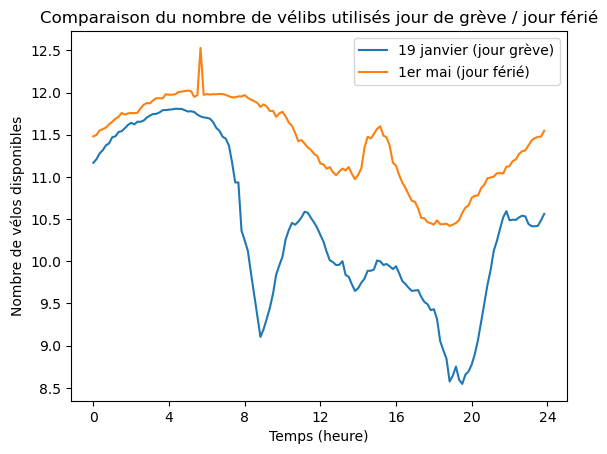

In [12]:
# 1er graphique :

start_date = dt.datetime(2023, 1, 19) + pd.DateOffset(days=0)   # dt.datetime() : date initiale sur laquelle on travaille
end_date   = dt.datetime(2023, 1, 19) + pd.DateOffset(days=1)   # DateOffset: type standard d'incrément de date utilisé pour une plage de dates, ici,
                                                                #l'argument est d'un jour pour travailler sur lintégralité du 19/01/2023 

mask = (df.index>= start_date) & (df.index <= end_date)         #condition où la date en index >=  à variable start_date (date de début) 
                                                                        #et <= end_date (date de fin) 

Y2 = df.loc[mask,'numbikesavailable_mean'].to_numpy()  # ordonnées du premier graphique : on applique la condition à la colonne nombre de vélibs disponibles du dataframe que 
                                                                    #que l'on convertit en tableau numpy

X = np.arange(0, len(Y2))                      # abscisses des graphiques : intervalle qui prend toutes les valeurs correspondant à la condition ci_dessus

##########################################
# 2ème graphique :

start_date = dt.datetime(2023, 5, 1) + pd.DateOffset(days=0)   # dt.datetime() : date initiale sur laquelle on travaille
end_date   = dt.datetime(2023, 5, 1) + pd.DateOffset(days=1)   # DateOffset: type standard d'incrément de date utilisé pour une plage de dates, ici,
                                                                #l'argument est d'un jour pour travailler sur lintégralité du 1/05/2023 

mask = (df.index>= start_date) & (df.index <= end_date)        #condition où la date en index >=  à variable start_date (date de début) 
                                                                        #et <= end_date (date de fin) 

Y3 = df.loc[mask,'numbikesavailable_mean'].to_numpy()  #ordonnées du second graphique : on applique la condition à la colonne nombre de vélibs disponibles 
                                                                # du dataframe que l'on convertit en tableau numpy

##########################################
labels = range(0, 80*5, 4)
plt.xticks(range(0, 2400, 24), labels)

# espacement de 24*10min = 4h
plt.title("Comparaison du nombre de vélibs utilisés jour de grève / jour férié")   # titre du graphique  
plt.xlabel('Temps (heure)')  # label de l'axe des abscisses
plt.ylabel('Nombre de vélos disponibles')  # label de l'axe des ordonnées : nombre de velibs disponibles moyen
plt.plot(X, Y2, label='19 janvier (jour grève)')  # affichage du graphique et label de la 1ère courbe
plt.plot(X, Y3, label='1er mai (jour férié)')   # affichage du graphique et label de la seconde courbe
plt.legend()
plt.show()





réseau plus sollicité en jour de grève que jour férié malgré la possibilité de télétravail lors des grèves.

# Comparaison journée sans voiture et journée normale

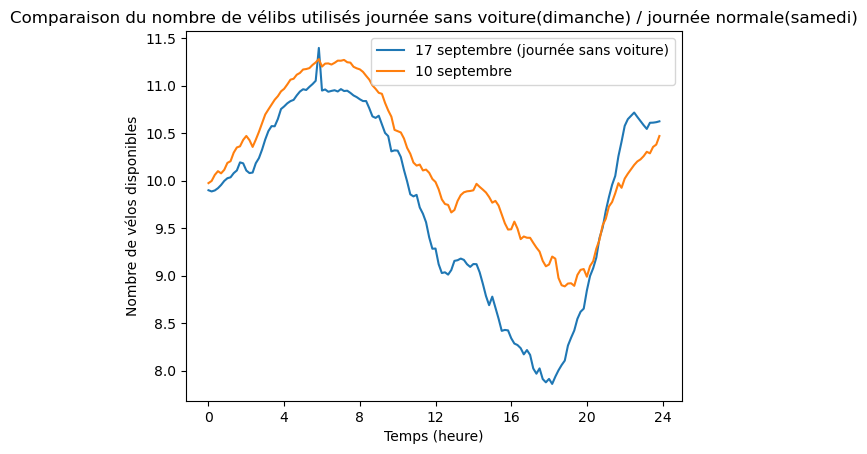

In [60]:
# 1ère courbe :

start_date = dt.datetime(2023, 9, 17) + pd.DateOffset(days=0)  # dt.datetime() : date initiale sur laquelle on travaille
end_date   = dt.datetime(2023, 9, 17) + pd.DateOffset(days=1)  # DateOffset: type standard d'incrément de date utilisé pour une plage de dates, ici,
                                                                #l'argument est d'un jour pour travailler sur lintégralité du 17/09/2023 

mask = (df.index>= start_date) & (df.index <= end_date)        # variable mask  : condition où la date en index >=  à variable start_date (date de début) 
                                                                        #et <= end_date (date de fin)            

Y2 = df.loc[mask,'numbikesavailable_mean'].to_numpy()  # ordonnées du premier graphique : on applique la condition à la colonne nombre de vélibs disponibles du dataframe que 
                                                                    #que l'on convertit en tableau numpy

X = np.arange(0, len(Y2))                           #  abscisses des graphiques : intervalle qui prend toutes les valeurs correspondant à la condition ci_dessus

##########################################
#2ème courbe : 
start_date = dt.datetime(2023, 9, 10) + pd.DateOffset(days=0)   # dt.datetime() : date initiale sur laquelle on travaille
end_date   = dt.datetime(2023, 9, 10) + pd.DateOffset(days=1)   # DateOffset: type standard d'incrément de date utilisé pour une plage de dates, ici,
                                                                #l'argument est d'un jour pour travailler sur lintégralité du 18/09/2023 

mask = (df.index>= start_date) & (df.index <= end_date)         # variable mask  : condition où la date en index >=  à variable start_date (date de début) 
                                                                        #et <= end_date (date de fin)        

Y3 = df.loc[mask,'numbikesavailable_mean'].to_numpy()  # ordonnées du second graphique : on applique la condition à la colonne nombre de vélibs disponibles 
                                                        # du dataframe que l'on convertit en tableau numpy

##########################################
labels = range(0, 80*5, 4)
plt.xticks(range(0, 2400, 24), labels)

# espacement de 24*10min = 4h
plt.title("Comparaison du nombre de vélibs utilisés journée sans voiture(dimanche) / journée normale(samedi)")  # titre du graphique
plt.xlabel('Temps (heure)')     # label de l'axe des abscisses
plt.ylabel('Nombre de vélos disponibles')    # label de l'axe des ordonnées : nombre de velibs disponibles moyen
plt.plot(X, Y2, label='17 septembre (journée sans voiture)') # affichage du graphique et label de la 1ère courbe
plt.plot(X, Y3, label='10 septembre') # affichage du graphique et label de la 2ème courbe
plt.legend(loc ="upper right")
plt.show()




# Comparaison avec 2 journées d'un concert Artic Monkeys le 9-10/05/2023

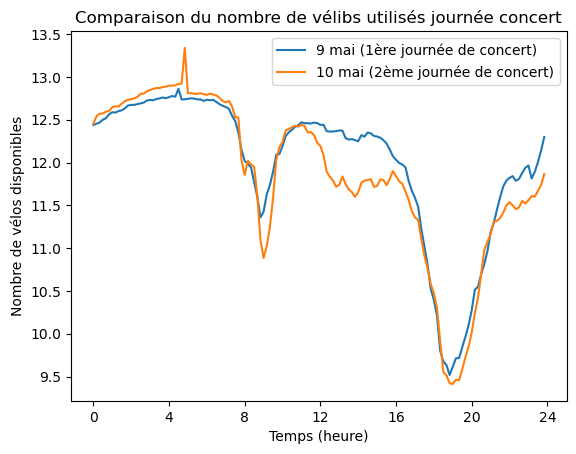

In [14]:
#  concert Artic Monkeys le 9-10/05/2023 AccorHotels Arena Paris Bercy : comparaison 1er et 2èmejour de concert

#1er graphique :
start_date = dt.datetime(2023, 5, 9) + pd.DateOffset(days=0)  # dt.datetime() : date initiale sur laquelle on travaille
end_date   = dt.datetime(2023, 5, 9) + pd.DateOffset(days=1)  # DateOffset: type standard d'incrément de date utilisé pour une plage de dates, ici,
                                                                #l'argument est d'un jour pour travailler sur lintégralité du 9/05/2023 

mask = (df.index>= start_date) & (df.index <= end_date)      # variable mask  : condition où la date en index >=  à variable start_date (date de début) 
                                                                        #et <= end_date (date de fin)

Y2 = df.loc[mask,'numbikesavailable_mean'].to_numpy()        # ordonnées du premier graphique : on applique la condition à la colonne nombre de vélibs disponibles 
                                                                    #du dataframe que l'on convertit en tableau numpy

X = np.arange(0, len(Y2))                 #  abscisses des graphiques : intervalle qui prend toutes les valeurs correspondant à la condition ci_dessus

##########################################
#2ème graphique :
start_date = dt.datetime(2023, 5, 10) + pd.DateOffset(days=0)   # dt.datetime() : date initiale sur laquelle on travaille
end_date   = dt.datetime(2023, 5, 10) + pd.DateOffset(days=1)   # DateOffset: type standard d'incrément de date utilisé pour une plage de dates, ici,
                                                                #l'argument est d'un jour pour travailler sur lintégralité du 10/05/2023 

mask = (df.index>= start_date) & (df.index <= end_date)         # variable mask  : condition où la date en index >=  à variable start_date (date de début) 
                                                                        #et <= end_date (date de fin)


Y3 = df.loc[mask,'numbikesavailable_mean'].to_numpy()            # ordonnées du second graphique : on applique la condition à la colonne nombre de vélibs disponibles 
                                                                    #du dataframe que l'on convertit en tableau numpy

##########################################
labels = range(0, 80*5, 4)
plt.xticks(range(0, 2400, 24), labels)

# espacement de 24*10min = 4h
plt.title("Comparaison du nombre de vélibs utilisés journée concert")    # titre du graphique
plt.xlabel('Temps (heure)')             # label de l'axe des abscisses
plt.ylabel('Nombre de vélos disponibles')  # label de l'axe des ordonnées : nombre de velibs disponibles moyen
plt.plot(X, Y2, label='9 mai (1ère journée de concert)')  # affichage du graphique et label de la 1ère courbe
plt.plot(X, Y3, label='10 mai (2ème journée de concert)')  # affichage du graphique et label de la seconde courbe
plt.legend()
plt.show()



In [52]:
Le réseau est un peu plus sollicité l'après-midi du 10 mai mais pour le reste, on observe la même tendance.

SyntaxError: unterminated string literal (detected at line 1) (3504211755.py, line 1)

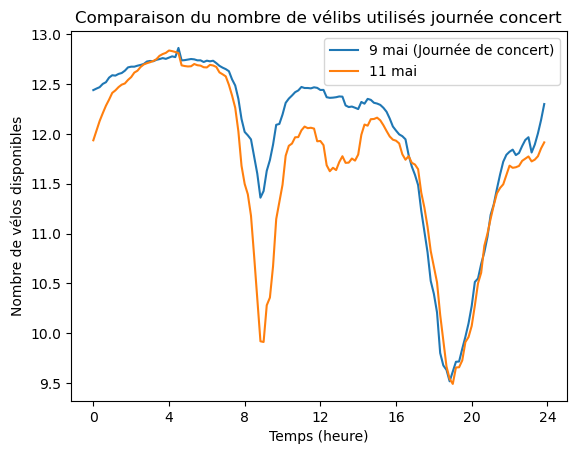

In [15]:
#  concert Artic Monkeys le 9-10/05/2023 AccorHotels Arena Paris Bercy :  comparaison  le 9 (1er jour concert) et 11 (jour normal)

start_date = dt.datetime(2023, 5, 9) + pd.DateOffset(days=0)   # dt.datetime() : date initiale sur laquelle on travaille
end_date   = dt.datetime(2023, 5, 9) + pd.DateOffset(days=1)   # DateOffset: type standard d'incrément de date utilisé pour une plage de dates, ici,
                                                                #l'argument est d'un jour pour travailler sur lintégralité du 9/05/2023 

mask = (df.index>= start_date) & (df.index <= end_date)        # variable mask  : condition où la date en index >=  à variable start_date (date de début) 
                                                                        #et <= end_date (date de fin) 

Y2 = df.loc[mask,'numbikesavailable_mean'].to_numpy()   # ordonnées du premier graphique : on applique la condition à la colonne nombre de vélibs disponibles  
                                                            # du dataframe que l'on convertit en tableau numpy

X = np.arange(0, len(Y2))                  #  abscisses des graphiques : intervalle qui prend toutes les valeurs correspondant à la condition ci_dessus

##########################################
start_date = dt.datetime(2023, 5, 11) + pd.DateOffset(days=0)  # dt.datetime() : date initiale sur laquelle on travaille
end_date   = dt.datetime(2023, 5, 11) + pd.DateOffset(days=1)  # DateOffset: type standard d'incrément de date utilisé pour une plage de dates, ici,
                                                                #l'argument est d'un jour pour travailler sur lintégralité du 11/05/2023 

mask = (df.index>= start_date) & (df.index <= end_date)        # variable mask  : condition où la date en index >=  à variable start_date (date de début) 
                                                                        #et <= end_date (date de fin) 

Y3 = df.loc[mask,'numbikesavailable_mean'].to_numpy()    # ordonnées du second graphique : on applique la condition à la colonne nombre de vélibs disponibles  
                                                            # du dataframe que l'on convertit en tableau numpy


##########################################
labels = range(0, 80*5, 4)
plt.xticks(range(0, 2400, 24), labels)

# espacement de 24*10min = 4h
plt.title("Comparaison du nombre de vélibs utilisés journée concert")  # titre du graphique
plt.xlabel('Temps (heure)')   # label de l'axe des abscisses
plt.ylabel('Nombre de vélos disponibles')  # label de l'axe des ordonnées : nombre de velibs disponibles moyen
plt.plot(X, Y2, label='9 mai (Journée de concert)')  #1ère journée de concert, affichage du graphique et label de la 1ère courbe
plt.plot(X, Y3, label='11 mai')  # affichage du graphique et label de la seconde courbe
plt.legend()
plt.show()



In [53]:
Lorsqu'on compare avec la journée dans concert du 11 mai, le phénomène du décharge est plus marqué le 11 que le 9, pour le reste, en fin de journée, 
on ne note de différence flagrante.

SyntaxError: unterminated string literal (detected at line 1) (1112107016.py, line 1)

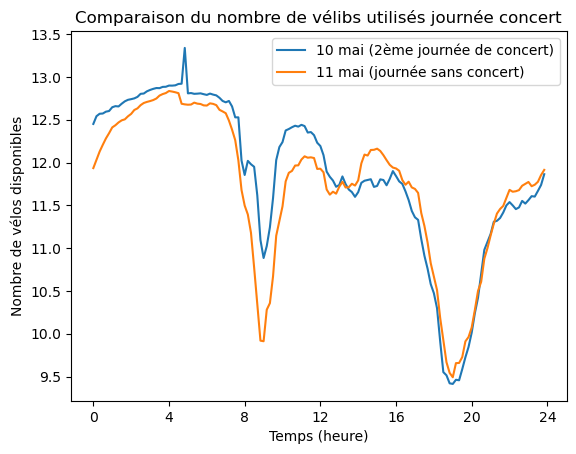

In [17]:
#  concert Artic Monkeys le 9-10/05/2023 AccorHotels Arena : comparaison entre le 10 jour de concert et le 11 jour normal

# 1ere courbe :

start_date = dt.datetime(2023, 5, 10) + pd.DateOffset(days=0)  # dt.datetime() : date initiale sur laquelle on travaille
end_date   = dt.datetime(2023, 5, 10) + pd.DateOffset(days=1)  # DateOffset: type standard d'incrément de date utilisé pour une plage de dates, ici,
                                                                #l'argument est d'un jour pour travailler sur lintégralité du 10/05/2023 

mask = (df.index>= start_date) & (df.index <= end_date)         # variable mask  : condition où la date en index >=  à variable start_date (date de début) 
                                                                        #et <= end_date (date de fin)        

Y2 = df.loc[mask,'numbikesavailable_mean'].to_numpy()   # ordonnées du premier graphique : on applique la condition à la colonne nombre de vélibs disponibles  
                                                            # du dataframe que l'on convertit en tableau numpy

X = np.arange(0, len(Y2))                        #  abscisses des graphiques : intervalle qui prend toutes les valeurs correspondant à la condition ci_dessus

##########################################
# 2ème courbe : 
start_date = dt.datetime(2023, 5, 11) + pd.DateOffset(days=0)   # dt.datetime() : date initiale sur laquelle on travaille
end_date   = dt.datetime(2023, 5, 11) + pd.DateOffset(days=1)   # DateOffset: type standard d'incrément de date utilisé pour une plage de dates, ici,
                                                                #l'argument est d'un jour pour travailler sur lintégralité du 11/05/2023 

mask = (df.index>= start_date) & (df.index <= end_date)         # variable mask  : condition où la date en index >=  à variable start_date (date de début) 
                                                                        #et <= end_date (date de fin)  

Y3 = df.loc[mask,'numbikesavailable_mean'].to_numpy()        # ordonnées du second graphique : on applique la condition à la colonne nombre de vélibs disponibles  
                                                            # du dataframe que l'on convertit en tableau numpy

##########################################
labels = range(0, 80*5, 4)
plt.xticks(range(0, 2400, 24), labels)

# espacement de 24*10min = 4h
plt.title("Comparaison du nombre de vélibs utilisés journée concert")  # titre du graphique
plt.xlabel('Temps (heure)')    # label de l'axe des abscisses
plt.ylabel('Nombre de vélos disponibles') # label de l'axe des ordonnées : nombre de velibs disponibles moyen
plt.plot(X, Y2, label='10 mai (2ème journée de concert)')   # affichage du graphique et label de la 1ère courbe
plt.plot(X, Y3, label='11 mai (journée sans concert)') # affichage du graphique et label de la seconde courbe
plt.legend()
plt.show()




Concert Artic Monkeys le 9-10/05/2023 à AccorHotels Arena Paris Bercy.

Le concert est en semaine et on ne constate pas de différence notable aussi bien en journée qu'à l'approche de l'heure du concert, en soirée, par rapport aux observations ci-dessus.